# Spanish Vehicle Registrations Analysis
## Understanding Spanish Vehicle Registrations through data analysis

Let's try to answer the following questions related to the [Microdatos de Matriculaciones de Vehículos (mensual)](https://www.dgt.es/menusecundario/dgt-en-cifras/dgt-en-cifras-resultados/dgt-en-cifras-detalle/Microdatos-de-parque-de-vehiculos-anual/) dataset, focusing just on tourism vehicles:

1. **Are the spanish costumers purchasing electrified vehicles?**
2. **Which spanish provinces have the biggest and smallest number of electrified vehicles registrations?**
3. **Which spanish provinces are registering more and less polluting vehicles?**
4. **Which car brands are selling more and less ecological cars in Spain?**

To help us explore and correctly use the dataset, we will make use of the PDF specification of the data included in the data provider website.

First of all, let's import the necessary packages to perform this analysis as well as the dataset:

In [1]:
import zipfile
import requests
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
# Looking at the dataset page, let's first list the links for the datasets of the last 12 months.
download_links = [
    'https://www.dgt.es/microdatos/salida/2023/3/vehiculos/matriculaciones/export_mensual_mat_202303.zip',
    'https://www.dgt.es/microdatos/salida/2024/4/vehiculos/matriculaciones/export_mensual_mat_202404.zip',
    'https://www.dgt.es/microdatos/salida/2024/5/vehiculos/matriculaciones/export_mensual_mat_202405.zip',
    'https://www.dgt.es/microdatos/salida/2024/6/vehiculos/matriculaciones/export_mensual_mat_202406.zip',
    'https://www.dgt.es/microdatos/salida/2024/7/vehiculos/matriculaciones/export_mensual_mat_202407.zip',
    'https://www.dgt.es/microdatos/salida/2024/8/vehiculos/matriculaciones/export_mensual_mat_202408.zip',
    'https://www.dgt.es/microdatos/salida/2024/9/vehiculos/matriculaciones/export_mensual_mat_202409.zip',
    'https://www.dgt.es/microdatos/salida/2024/10/vehiculos/matriculaciones/export_mensual_mat_202410.zip',
    'https://www.dgt.es/microdatos/salida/2024/11/vehiculos/matriculaciones/export_mensual_mat_202411.zip',
    'https://www.dgt.es/microdatos/salida/2024/12/vehiculos/matriculaciones/export_mensual_mat_202412.zip',
    'https://www.dgt.es/microdatos/salida/2025/1/vehiculos/matriculaciones/export_mensual_mat_202501.zip',
    'https://www.dgt.es/microdatos/salida/2025/2/vehiculos/matriculaciones/export_mensual_mat_202502.zip'
]

# As the file is fixed-width formatted, we need to define the name and width of the columns
names = [
    'FEC_MATRICULA',
    'COD_CLASE_MAT',
    'FEC_TRAMITACION',
    'MARCA_ITV',
    'MODELO_ITV',
    'COD_PROCEDENCIA_ITV',
    'BASTIDOR_ITV',
    'COD_TIPO',
    'COD_PROPULSION_ITV',
    'CILINDRADA_ITV',
    'POTENCIA_ITV',
    'TARA',
    'PESO_MAX',
    'NUM_PLAZAS',
    'IND_PRECINTO',
    'IND_EMBARGO',
    'NUM_TRANSMISIONES',
    'NUM_TITULARES',
    'LOCALIDAD_VEHICULO',
    'COD_PROVINCIA_VEH',
    'COD_PROVINCIA_MAT',
    'CLAVE_TRAMITE',
    'FEC_TRAMITE',
    'CODIGO_POSTAL',
    'FEC_PRIM_MATRICULACION',
    'IND_NUEVO_USADO',
    'PERSONA_FISICA_JURIDICA',
    'CODIGO_ITV',
    'SERVICIO',
    'COD_MUNICIPIO_INE_VEH',
    'MUNICIPIO',
    'KW_ITV',
    'NUM_PLAZAS_MAX',
    'CO2_ITV',
    'RENTING',
    'COD_TUTELA',
    'COD_POSESION',
    'IND_BAJA_DEF',
    'IND_BAJA_TEMP',
    'IND_SUSTRACCION',
    'BAJA_TELEMATICA',
    'TIPO_ITV',
    'VARIANTE_ITV',
    'VERSION_ITV',
    'FABRICANTE_ITV',
    'MASA_ORDEN_MARCHA_ITV',
    'MASA_MAXIMA_TECNICA_ADMISIBLE_ITV',
    'CATEGORIA_HOMOLOGACION_EUROPEA_ITV',
    'CARROCERIA',
    'PLAZAS_PIE',
    'NIVEL_EMISIONES_EURO_ITV',
    'CONSUMO_WH_KM_ITV',
    'CLASIFICACION_REGLAMENTO_VEHICULOS_ITV',
    'CATEGORIA_VEHICULO_ELECTRICO',
    'AUTONOMIA_VEHICULO_ELECTRICO',
    'MARCA_VEHICULO_BASE',
    'FABRICANTE_VEHICULO_BASE',
    'TIPO_VEHICULO_BASE',
    'VARIANTE_VEHICULO_BASE',
    'VERSION_VEHICULO_BASE',
    'DISTANCIA_EJES_12_ITV',
    'VIA_ANTERIOR_ITV',
    'VIA_POSTERIOR_ITV',
    'TIPO_ALIMENTACION_ITV',
    'CONTRASENA_HOMOLOGACION_ITV',
    'ECO_INNOVACION_ITV',
    'REDUCCION_ECO_ITV',
    'CODIGO_ECO_ITV',
    'FEC_PROCESO'
]

widths = [
    8,  # FEC_MATRICULA
    1,  # COD_CLASE_MAT
    8,  # FEC_TRAMITACION
    30,  # MARCA_ITV
    22,  # MODELO_ITV
    1,  # COD_PROCEDENCIA_ITV
    21,  # BASTIDOR_ITV
    2,  # COD_TIPO
    1,  # COD_PROPULSION_ITV
    5,  # CILINDRADA_ITV
    6,  # POTENCIA_ITV
    6,  # TARA
    6,  # PESO_MAX
    3,  # NUM_PLAZAS
    2,  # IND_PRECINTO
    2,  # IND_EMBARGO
    2,  # NUM_TRANSMISIONES
    2,  # NUM_TITULARES
    24,  # LOCALIDAD_VEHICULO
    2,  # COD_PROVINCIA_VEH
    2,  # COD_PROVINCIA_MAT
    1,  # CLAVE_TRAMITE
    8,  # FEC_TRAMITE
    5,  # CODIGO_POSTAL
    8,  # FEC_PRIM_MATRICULACION
    1,  # IND_NUEVO_USADO
    1,  # PERSONA_FISICA_JURIDICA
    9,  # CODIGO_ITV
    3,  # SERVICIO
    5,  # COD_MUNICIPIO_INE_VEH
    30,  # MUNICIPIO
    7,  # KW_ITV
    3,  # NUM_PLAZAS_MAX
    5,  # CO2_ITV
    1,  # RENTING
    1,  # COD_TUTELA
    1,  # COD_POSESION
    1,  # IND_BAJA_DEF
    1,  # IND_BAJA_TEMP
    1,  # IND_SUSTRACCION
    11,  # BAJA_TELEMATICA
    25,  # TIPO_ITV
    25,  # VARIANTE_ITV
    35,  # VERSION_ITV
    70,  # FABRICANTE_ITV
    6,  # MASA_ORDEN_MARCHA_ITV
    6,  # MASA_MAXIMA_TECNICA_ADMISIBLE_ITV
    4,  # CATEGORIA_HOMOLOGACION_EUROPEA_ITV
    4,  # CARROCERIA
    3,  # PLAZAS_PIE
    8,  # NIVEL_EMISIONES_EURO_ITV
    4,  # CONSUMO_WH_KM_ITV
    4,  # CLASIFICACION_REGLAMENTO_VEHICULOS_ITV
    4,  # CATEGORIA_VEHICULO_ELECTRICO
    6,  # AUTONOMIA_VEHICULO_ELECTRICO
    30,  # MARCA_VEHICULO_BASE
    50,  # FABRICANTE_VEHICULO_BASE
    35,  # TIPO_VEHICULO_BASE
    25,  # VARIANTE_VEHICULO_BASE
    35,  # VERSION_VEHICULO_BASE
    4,  # DISTANCIA_EJES_12_ITV
    4,  # VIA_ANTERIOR_ITV
    4,  # VIA_POSTERIOR_ITV
    1,  # TIPO_ALIMENTACION_ITV
    25,  # CONTRASENA_HOMOLOGACION_ITV
    1,  # ECO_INNOVACION_ITV
    4,  # REDUCCION_ECO_ITV
    25,  # CODIGO_ECO_ITV
    8  # FEC_PROCESO
]

df = pd.DataFrame()

for link in download_links:
    # Downloads the file
    response = requests.get(link)
    # Unzips the file
    zip_file = zipfile.ZipFile(io.BytesIO(response.content))
    fwf_file_name = link[-29:-3]+'txt'
    extracted_path = zip_file.extract(fwf_file_name)
    print(f'Reading {fwf_file_name}...')
    # Read the FWF file into a pandas DataFrame
    df_temp = pd.read_fwf(extracted_path, names=names, widths=widths, encoding='latin1', skiprows=1, keep_default_na=False, na_values=[''])
    # Concatenates the temporal DF into the big project DF
    df = pd.concat([df, df_temp])

df.head()

Reading export_mensual_mat_202303.txt...
Reading export_mensual_mat_202404.txt...
Reading export_mensual_mat_202405.txt...
Reading export_mensual_mat_202406.txt...
Reading export_mensual_mat_202407.txt...
Reading export_mensual_mat_202408.txt...
Reading export_mensual_mat_202409.txt...
Reading export_mensual_mat_202410.txt...
Reading export_mensual_mat_202411.txt...
Reading export_mensual_mat_202412.txt...
Reading export_mensual_mat_202501.txt...
Reading export_mensual_mat_202502.txt...


,FEC_MATRICULA,COD_CLASE_MAT,FEC_TRAMITACION,MARCA_ITV,MODELO_ITV,COD_PROCEDENCIA_ITV,BASTIDOR_ITV,COD_TIPO,COD_PROPULSION_ITV,CILINDRADA_ITV,...,VERSION_VEHICULO_BASE,DISTANCIA_EJES_12_ITV,VIA_ANTERIOR_ITV,VIA_POSTERIOR_ITV,TIPO_ALIMENTACION_ITV,CONTRASENA_HOMOLOGACION_ITV,ECO_INNOVACION_ITV,REDUCCION_ECO_ITV,CODIGO_ECO_ITV,FEC_PROCESO
0,1032023,0,NaN,SEAT,IBIZA,3,VSSZZZKJ3PR081345,40,0,999,...,NaN,2548,1499,1479,M,NaN,S,NaN,E9 29 37,1032023
1,1032023,0,NaN,FIAT,FIAT DUCATO,3,ZFA25000002W59155,20,1,2184,...,NaN,3450,1810,1790,M,NaN,NaN,NaN,NaN,1032023
2,1032023,0,NaN,DR,DR 4.0,3,ZPYT39DM2UN819349,40,0,1498,...,NaN,2610,1550,1550,NaN,NaN,NaN,NaN,NaN,1032023
3,1032023,0,NaN,VOLKSWAGEN,GOLF,3,WVWZZZCD5PW154310,40,1,1968,...,NaN,2619,1550,1519,M,NaN,S,NaN,E13 29 37,1032023
4,1032023,0,NaN,SCANIA,TDX27 ASTROMEGA K EB6X,3,YS2K6X20001891134,30,1,12742,...,X27SD3-K6X2,6900,2067,2067,M,NaN,NaN,0.0,NaN,1032023


Now that we loaded the dataset, let's check the data types that Pandas automatically gave to our columns to see if something it's wrong or can be improved.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1745318 entries, 0 to 147084
Data columns (total 69 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   FEC_MATRICULA                           int64  
 1   COD_CLASE_MAT                           int64  
 2   FEC_TRAMITACION                         float64
 3   MARCA_ITV                               object 
 4   MODELO_ITV                              object 
 5   COD_PROCEDENCIA_ITV                     object 
 6   BASTIDOR_ITV                            object 
 7   COD_TIPO                                object 
 8   COD_PROPULSION_ITV                      object 
 9   CILINDRADA_ITV                          int64  
 10  POTENCIA_ITV                            float64
 11  TARA                                    int64  
 12  PESO_MAX                                int64  
 13  NUM_PLAZAS                              int64  
 14  IND_PRECINTO                            

We can see already some things to fix here:
1. Dates are stored as numbers. We should convert them to `datetime`.
2. Some categorical data is stored as object or numbers, we can store them as `category` to improve performance.
3. Some numerical variables are stored as 64 bits types but in fact need much less, so we can reduce its size to improve performance as well.

Let's correct this in the following code block.


In [4]:
# Convert the date columns to type datetime.
df['FEC_MATRICULA'] = pd.to_datetime(df['FEC_MATRICULA'], format='%d%m%Y', dayfirst=True, errors='coerce')
df['FEC_TRAMITACION'] = pd.to_datetime(df['FEC_TRAMITACION'], format='%d%m%Y', dayfirst=True, errors='coerce')
df['FEC_TRAMITE'] = pd.to_datetime(df['FEC_TRAMITE'], format='%d%m%Y', dayfirst=True, errors='coerce')
df['FEC_PRIM_MATRICULACION'] = pd.to_datetime(df['FEC_PRIM_MATRICULACION'], format='%d%m%Y', dayfirst=True, errors='coerce')
df['FEC_PROCESO'] = pd.to_datetime(df['FEC_PROCESO'], format='%d%m%Y', dayfirst=True, errors='coerce')

# Convert the categorical variables to type category.
df['COD_CLASE_MAT'] = df['COD_CLASE_MAT'].astype('category')
df['COD_PROCEDENCIA_ITV'] = df['COD_PROCEDENCIA_ITV'].astype('category')
df['COD_TIPO'] = df['COD_TIPO'].astype('category')
df['COD_PROPULSION_ITV'] = df['COD_PROPULSION_ITV'].astype('category')
df['IND_PRECINTO'] = df['IND_PRECINTO'].astype('category')
df['IND_EMBARGO'] = df['IND_EMBARGO'].astype('category')
df['COD_PROVINCIA_VEH'] = df['COD_PROVINCIA_VEH'].astype('category')
df['COD_PROVINCIA_MAT'] = df['COD_PROVINCIA_MAT'].astype('category')
df['CLAVE_TRAMITE'] = df['CLAVE_TRAMITE'].astype('category')
df['IND_NUEVO_USADO'] = df['IND_NUEVO_USADO'].astype('category')
df['PERSONA_FISICA_JURIDICA'] = df['PERSONA_FISICA_JURIDICA'].astype('category')
df['SERVICIO'] = df['SERVICIO'].astype('category')
df['RENTING'] = df['RENTING'].astype('category')
df['COD_TUTELA'] = df['COD_TUTELA'].astype('category')
df['COD_POSESION'] = df['COD_POSESION'].astype('category')
df['IND_BAJA_DEF'] = df['IND_BAJA_DEF'].astype('category')
df['IND_BAJA_TEMP'] = df['IND_BAJA_TEMP'].astype('category')
df['IND_SUSTRACCION'] = df['IND_SUSTRACCION'].astype('category')
df['BAJA_TELEMATICA'] = df['BAJA_TELEMATICA'].astype('category')
df['TIPO_ITV'] = df['TIPO_ITV'].astype('category')
df['VARIANTE_ITV'] = df['VARIANTE_ITV'].astype('category')
df['VERSION_ITV'] = df['VERSION_ITV'].astype('category')
df['FABRICANTE_ITV'] = df['FABRICANTE_ITV'].astype('category')
df['CARROCERIA'] = df['CARROCERIA'].astype('category')
df['NIVEL_EMISIONES_EURO_ITV'] = df['NIVEL_EMISIONES_EURO_ITV'].astype('category')
df['CLASIFICACION_REGLAMENTO_VEHICULOS_ITV'] = df['CLASIFICACION_REGLAMENTO_VEHICULOS_ITV'].astype('category')
df['CATEGORIA_VEHICULO_ELECTRICO'] = df['CATEGORIA_VEHICULO_ELECTRICO'].astype('category')
df['TIPO_ALIMENTACION_ITV'] = df['TIPO_ALIMENTACION_ITV'].astype('category')
df['ECO_INNOVACION_ITV'] = df['ECO_INNOVACION_ITV'].astype('category')
df['REDUCCION_ECO_ITV'] = df['REDUCCION_ECO_ITV'].astype('category')

# Convert the numerical variables to shorter types.
df['CILINDRADA_ITV'] = df['CILINDRADA_ITV'].astype('int16')
df['POTENCIA_ITV'] = df['POTENCIA_ITV'].astype('int16')
df['TARA'] = df['TARA'].astype('int16')
df['PESO_MAX'] = df['PESO_MAX'].astype('int16')
df['NUM_PLAZAS'] = df['NUM_PLAZAS'].astype('int8')
df['NUM_TRANSMISIONES'] = df['NUM_TRANSMISIONES'].astype('int8')
df['NUM_TITULARES'] = df['NUM_TITULARES'].astype('int8')
df['CODIGO_POSTAL'] = df['CODIGO_POSTAL'].astype('int16')
df['COD_MUNICIPIO_INE_VEH'] = df['COD_MUNICIPIO_INE_VEH'].astype('int16')
df['KW_ITV'] = pd.to_numeric(df['KW_ITV'], errors='coerce')
df['KW_ITV'] = df['KW_ITV'].astype('float32')
df['NUM_PLAZAS_MAX'] = df['NUM_PLAZAS_MAX'].astype('int8')
df['CO2_ITV'] = df['CO2_ITV'].astype('float32')
df['AUTONOMIA_VEHICULO_ELECTRICO'] = df['AUTONOMIA_VEHICULO_ELECTRICO'].str.replace(',', '.').astype('float32')
df['DISTANCIA_EJES_12_ITV'] = df['DISTANCIA_EJES_12_ITV'].astype('int8')
df['VIA_ANTERIOR_ITV'] = df['VIA_ANTERIOR_ITV'].astype('int8')
df['VIA_POSTERIOR_ITV'] = df['VIA_POSTERIOR_ITV'].astype('int8')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1745318 entries, 0 to 147084
Data columns (total 69 columns):
 #   Column                                  Dtype         
---  ------                                  -----         
 0   FEC_MATRICULA                           datetime64[ns]
 1   COD_CLASE_MAT                           category      
 2   FEC_TRAMITACION                         datetime64[ns]
 3   MARCA_ITV                               object        
 4   MODELO_ITV                              object        
 5   COD_PROCEDENCIA_ITV                     category      
 6   BASTIDOR_ITV                            object        
 7   COD_TIPO                                category      
 8   COD_PROPULSION_ITV                      category      
 9   CILINDRADA_ITV                          int16         
 10  POTENCIA_ITV                            int16         
 11  TARA                                    int16         
 12  PESO_MAX                                int16   

As we can see, the `DataFrame` almost reduced in size. Now it's time to clean and prepare the data so we can make the best use of it.
First we will check which columns have high number of NAs.

In [5]:
full_na_cols = set(df.columns[df.isnull().mean() == 1]) #Provide a set of columns with all the values missing
print(f'Columns with all NAs: {full_na_cols}')
most_na_cols = set(df.columns[df.isnull().mean() > 0.95]) #Provide a set of columns with more than 95% of the values missing
print(f'Columns with more than 95% NAs: {most_na_cols}')

Columns with all NAs: {'CONTRASENA_HOMOLOGACION_ITV', 'IND_BAJA_DEF', 'BAJA_TELEMATICA', 'TIPO_ITV'}
Columns with more than 95% NAs: {'VARIANTE_VEHICULO_BASE', 'BAJA_TELEMATICA', 'TIPO_ITV', 'IND_EMBARGO', 'COD_POSESION', 'REDUCCION_ECO_ITV', 'IND_BAJA_TEMP', 'CONTRASENA_HOMOLOGACION_ITV', 'FEC_TRAMITACION', 'TIPO_VEHICULO_BASE', 'MARCA_VEHICULO_BASE', 'VERSION_VEHICULO_BASE', 'IND_BAJA_DEF', 'IND_PRECINTO', 'COD_TUTELA', 'IND_SUSTRACCION'}


Analyzing the results, we can see that the full `TIPO_ITV`, `CONTRASENA_HOMOLOGACION_ITV`, `BAJA_TELEMATICA` and `IND_BAJA_DEF` columns are missing. We will drop them in the next code block.

Also, we can see that several columns have more than 95% values missing. We will drop all them too as they are not relevant for our analysis.

After that, we will look deeper into columns with high level of NAs.

In [6]:
df = df.drop(columns=most_na_cols)

na_cols_75 = set(df.columns[df.isnull().mean() > 0.75]) #Provide a set of columns with more than 95% of the values missing
print(f'Columns with more than 75% NAs: {na_cols_75}')
na_cols_50 = set(df.columns[df.isnull().mean() > 0.50]) #Provide a set of columns with more than 50% of the values missing
print(f'Columns with more than 50% NAs: {na_cols_50}')
na_cols_25 = set(df.columns[df.isnull().mean() > 0.25]) #Provide a set of columns with more than 25% of the values missing
print(f'Columns with more than 25% NAs: {na_cols_25}')

Columns with more than 75% NAs: {'CODIGO_ITV', 'FEC_PRIM_MATRICULACION', 'FABRICANTE_VEHICULO_BASE'}
Columns with more than 50% NAs: {'CODIGO_ECO_ITV', 'CODIGO_ITV', 'FABRICANTE_VEHICULO_BASE', 'CATEGORIA_VEHICULO_ELECTRICO', 'AUTONOMIA_VEHICULO_ELECTRICO', 'FEC_PRIM_MATRICULACION'}
Columns with more than 25% NAs: {'CODIGO_ECO_ITV', 'CODIGO_ITV', 'ECO_INNOVACION_ITV', 'FABRICANTE_VEHICULO_BASE', 'CATEGORIA_VEHICULO_ELECTRICO', 'AUTONOMIA_VEHICULO_ELECTRICO', 'FEC_PRIM_MATRICULACION'}


In the case of `FEC_PRIM_MATRICULACION` we know that it stores the first registration date of the vehicle. It is possible that the high value of NAs is due to that this field is only included for cars that are not new. We can use the field `IND_NUEVO_USADO` to see that and if that is true then we can drop the rows having used cars (as they are not relevant for this analysis) as well as both columns. Let's check that.

In [7]:
num_rows_fec_prim_mat_not_na = df['FEC_PRIM_MATRICULACION'].notnull().sum()
num_rows_fec_prim_mat_not_na_and_used_car = df[(df['FEC_PRIM_MATRICULACION'].notnull()) & (df['IND_NUEVO_USADO'] == 'U')].shape[0]
print(f'Number of cars with FEC_PRIM_MATRICULACION: {num_rows_fec_prim_mat_not_na}')
print(f'Number of used cars with FEC_PRIM_MATRICULACION: {num_rows_fec_prim_mat_not_na_and_used_car}')

Number of cars with FEC_PRIM_MATRICULACION: 189956
Number of used cars with FEC_PRIM_MATRICULACION: 189956


As seen, our theory was true so we can proceed with only having in account new cars and dropping the columns `FEC_PRIM_MATRICULACION` and `IND_NUEVO_USADO`.

In [8]:
df = df[df['IND_NUEVO_USADO'] == 'N']
df = df.drop(columns=['FEC_PRIM_MATRICULACION', 'IND_NUEVO_USADO'])

Finally, we will also drop the columns `FABRICANTE_VEHICULO_BASE` and `CODIGO_ITV` as the first one is not relevant for our analysis and the second one is a different identification of a car model used by technical service points, so would be redundant with the other fields representing car brand, model, etc.

We will not drop any more columns as the other with high number of NAs are related to electrified vehicles, which is very relevant for our analysis and it's correct that they have NAs for non electrified vehicles.

In [9]:
df = df.drop(columns=['FABRICANTE_VEHICULO_BASE', 'CODIGO_ITV'])

We also will add the names of the provinces so we get more understandable graphics.

In [10]:
df['PROV_NAME'] = df['COD_PROVINCIA_VEH'].map({
    'AL': 'Almería',
    'CA': 'Cádiz',
    'CO': 'Córdoba',
    'GR': 'Granada',
    'H': 'Huelva',
    'J': 'Jaén',
    'MA': 'Málaga',
    'SE': 'Sevilla',
    'HU': 'Huesca',
    'TE': 'Teruel',
    'Z': 'Zaragoza',
    'S': 'Cantabria',
    'LO': 'La Rioja',
    'VA': 'Valladolid',
    'BI': 'Vizcaya',
    'ZA': 'Zamora',
    'AV': 'Ávila',
    'BU': 'Burgos',
    'CC': 'Cáceres',
    'CR': 'Ciudad Real',
    'CU': 'Cuenca',
    'GU': 'Guadalajara',
    'TO': 'Toledo',
    'AB': 'Albacete',
    'B': 'Barcelona',
    'GI': 'Girona',
    'L': 'Lleida',
    'T': 'Tarragona',
    'A': 'Alicante',
    'CS': 'Castellón',
    'V': 'Valencia',
    'LE': 'León',
    'LU': 'Lugo',
    'OU': 'Ourense',
    'PO': 'Pontevedra',
    'M': 'Madrid',
    'MU': 'Murcia',
    'NA': 'Navarra',
    'C': 'A Coruña',
    'SA': 'Salamanca',
    'SG': 'Segovia',
    'SO': 'Soria',
    'SS': 'Guipúzcoa',
    'P': 'Palencia',
    'GC': 'Las Palmas',
    'TF': 'Santa Cruz de Tenerife',
    'BA': 'Badajoz',
    'CE': 'Ceuta',
    'ML': 'Melilla',
    'IB': 'Baleares',
    'VI': 'Álava',
    'O': 'Asturias'
})
code_names = pd.DataFrame()
code_names = df[['COD_PROVINCIA_VEH', 'PROV_NAME']].copy().drop_duplicates()
code_names.columns = ['CODE', 'NAME']
code_names.sort_values(by='CODE', inplace=True)

Now that we have loaded and cleaned the dataset, let's filter the data so we just have tourism vehicles, as it's the only kind of vehicles we are interested in for this analysis:

In [11]:
df = df[df['COD_TIPO'] == '40'] # Select from the column 'SUBTIPO_DGT' the type '40', which we can see from the PDF provided by the DGT means tourism vehicles
df = df.drop(columns=['COD_TIPO']) # Drop the column 'SUBTIPO_DGT' as it is no longer needed
print(f'There have been {df.shape[0]} tourism vehicles registered in Spain in the last 12 months.')

There have been 1032814 tourism vehicles registered in Spain in the last 12 months.


With our clean dataset, we can now proceed to answer to the questions that motivated this analysis. Let's start with the first one regarding the purchase of elecrtrified vehicles by spanish consumers.

First of all, let's have a look at the distribution of the total registrations based on propulsion type.

<Axes: xlabel='COD_PROPULSION_ITV'>

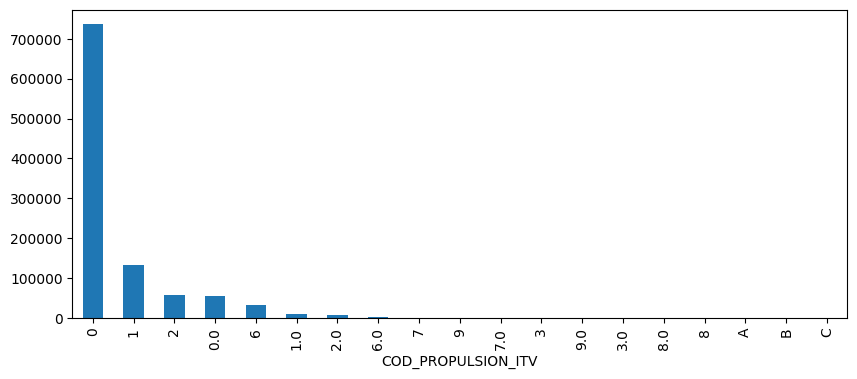

In [12]:
# We draw a bar chart with all the cars for each COD_PROPULSION_ITV to see its distribution
df['COD_PROPULSION_ITV'].value_counts().plot(kind='bar', figsize=(10, 4))

We can see that our process of cleaning the data was missing an important point, and that is that the code that defines the propulsion method for the registered car has numbers that were written with decimal positions and other without them. We need to clean this.

<Axes: xlabel='COD_PROPULSION_ITV'>

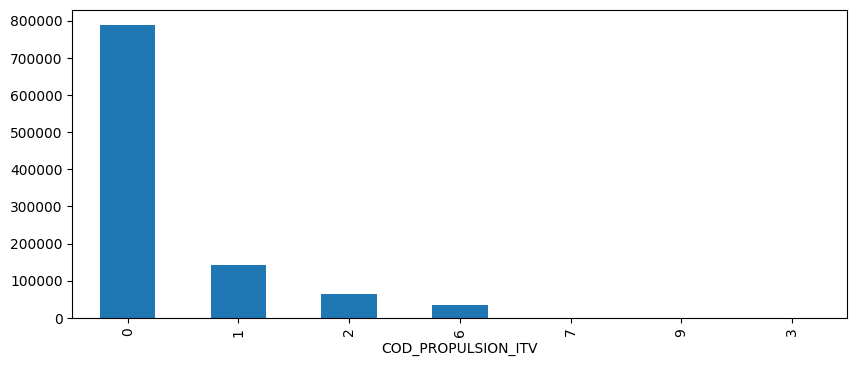

In [13]:
# We transform COD_PROPULSION_ITV so that we correct the decimal numbers
df['COD_PROPULSION_ITV'] = df['COD_PROPULSION_ITV'].apply(lambda x: str(x)[0] if '.' in str(x) else str(x))
df['COD_PROPULSION_ITV'].value_counts().plot(kind='bar', figsize=(10, 4))

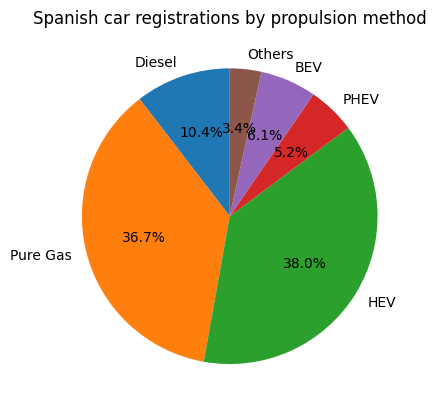

In [14]:
labels = ['Diesel', 'Pure Gas', 'HEV', 'PHEV', 'BEV', 'Others'] # List the propulsion methods we are interested in

def determine_propulsion(propulsion_code, electric_code):
    if pd.isna(electric_code):
      if pd.isna(propulsion_code):
        return 'Not specified'
      elif propulsion_code == '0':
        return 'Pure Gas'
      elif propulsion_code == '1':
        return 'Diesel'
      else:
        return 'Others'
    elif electric_code == 'BEV':
      return 'BEV'
    elif electric_code == 'PHEV':
      return 'PHEV'
    elif electric_code == 'HEV':
      return 'HEV'
    else:
      return 'Others'

# Create a new column with the propulsion method and drop the COD_PROPULSION_ITV and CATEGORIA_VEHICULO_ELECTRICO columns
df['PROPULSION_METHOD'] = df.apply(lambda x: determine_propulsion(x['COD_PROPULSION_ITV'], x['CATEGORIA_VEHICULO_ELECTRICO']), axis=1)
df = df.drop(columns=['COD_PROPULSION_ITV', 'CATEGORIA_VEHICULO_ELECTRICO'])

# Find the percentages of each method
phev_perc = (df['PROPULSION_METHOD'] == 'PHEV').mean()
hev_perc = (df['PROPULSION_METHOD'] == 'HEV').mean()
gas_perc = (df['PROPULSION_METHOD'] == 'Pure Gas').mean()
diesel_perc = (df['PROPULSION_METHOD'] == 'Diesel').mean()
bev_perc = (df['PROPULSION_METHOD'] == 'BEV').mean()
other_perc = (df['PROPULSION_METHOD'] == 'Others').mean()

# Create a pie chart (we don't include nans % as the proportion is not relevant)
fig, ax = plt.subplots()
ax.pie([diesel_perc, gas_perc, hev_perc, phev_perc, bev_perc, other_perc], labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Spanish car registrations by propulsion method')
fig.show()

For our first question, **"Are the spanish costumers purchasing electrified vehicles?"**, we can see that the **electrified options still don't make 50% of the market**, but we see that **HEV** (Hybrid Electric Vehicles - Gas cars with electric motor support) **is the most registered category**.

Still, **PHEV (Plug in Hybrid Electric Vehicle) + BEV (Battery Electric Vehicles) amount for only 11.3% of the registrations, and only 6.1% is 100% electric.**

**That indicates that Spain still has a long way to go to reach 0 emissions registrations.**

Let's continue with the second question:
**"Which spanish provinces have the biggest and smallest number of electrified vehicles registrations?"**

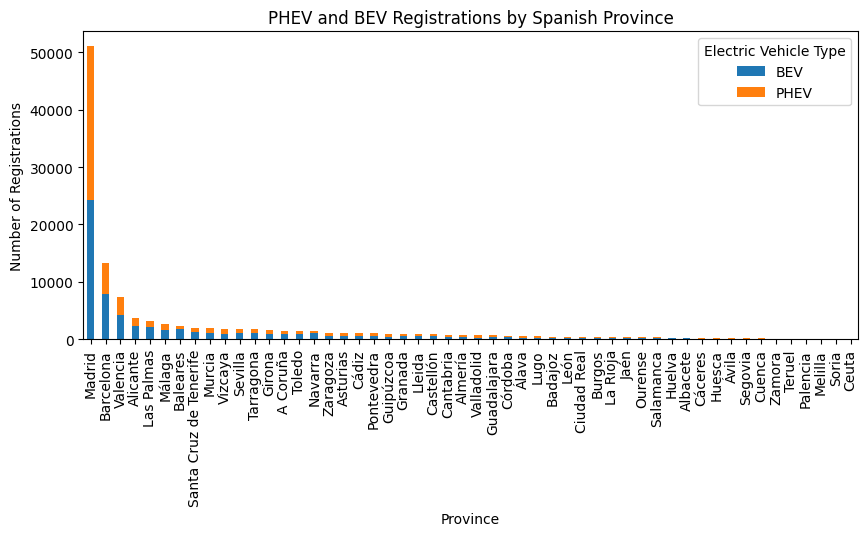

In [15]:
# Create a df with only PHEV and BEV registrations
bev_and_phev_df = df[(df['PROPULSION_METHOD'] == 'PHEV') | (df['PROPULSION_METHOD'] == 'BEV')].copy()
bev_and_phev_df['BEV_OR_PHEV'] = bev_and_phev_df['PROPULSION_METHOD'].apply(lambda x: 'BEV' if x == 'BEV' else 'PHEV')

# Group by province and vehicle type, then calculate totals
bev_and_phev_grouped_df = bev_and_phev_df.groupby(['PROV_NAME', 'BEV_OR_PHEV'], observed=True).size().unstack().fillna(0)
bev_and_phev_grouped_df['Total'] = bev_and_phev_grouped_df.sum(axis=1)
bev_and_phev_grouped_df = bev_and_phev_grouped_df.sort_values(by='Total', ascending=False)
bev_and_phev_grouped_df = bev_and_phev_grouped_df.drop(columns=['Total'])

# Draw a bar plot of PHEV and BEV registrations by province in Spain
ax = bev_and_phev_grouped_df.plot(kind='bar', stacked=True, figsize=(10, 4))
plt.xlabel('Province')
plt.ylabel('Number of Registrations')
plt.title('PHEV and BEV Registrations by Spanish Province')
ax.legend(title='Electric Vehicle Type')

plt.show()

We can see in the bar chart that the PHEV and BEV registrations are mostly done in the provinces of Madrid, Barcelona and Valencia. Let's take a closer look to the top 10.

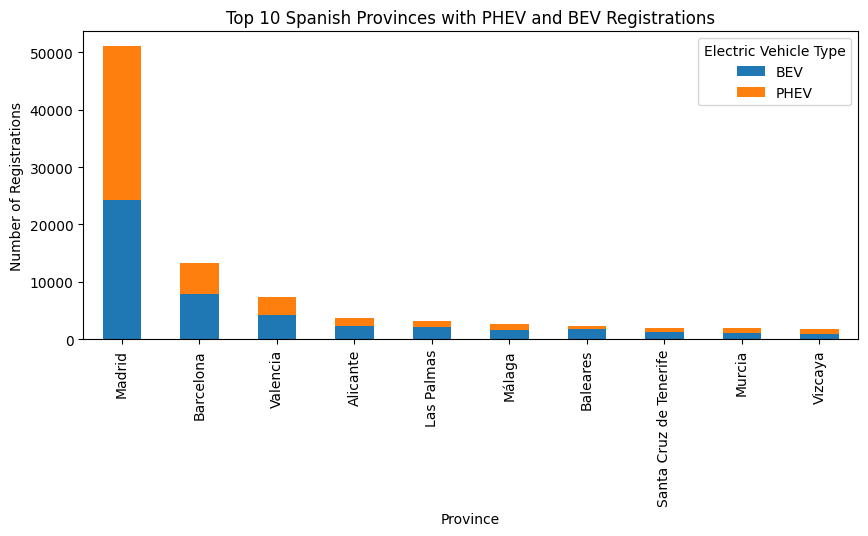

BEV_OR_PHEV,BEV,PHEV
PROV_NAME,,
Madrid,24253,26819
Barcelona,7818,5466
Valencia,4282,3126
Alicante,2343,1310
Las Palmas,2074,1112
Málaga,1671,1061
Baleares,1820,574
Santa Cruz de Tenerife,1209,829
Murcia,1123,786


In [16]:
# Get the top 10 spanish provinces with PHEV and BEV registrations
ax = bev_and_phev_grouped_df.head(10).plot(kind='bar', stacked=True, figsize=(10, 4))
plt.xlabel('Province')
plt.ylabel('Number of Registrations')
plt.title('Top 10 Spanish Provinces with PHEV and BEV Registrations')
ax.legend(title='Electric Vehicle Type')

plt.show()
bev_and_phev_grouped_df.head(10)

We can clearly see that Madrid is by far the spanish province with most PHEV and BEV vehicle registrations, followed by  Barcelona and Valencia. But the capital of the country being so different to other regions could lead us to think that the big numbers are maybe related to fleets (Rent a Cars, Rentings, etc) of companies registered there.

We can check this by dividing the dataset between cars registered by individuals or by companies with the field `PERSONA_FISICA_JURIDICA`.

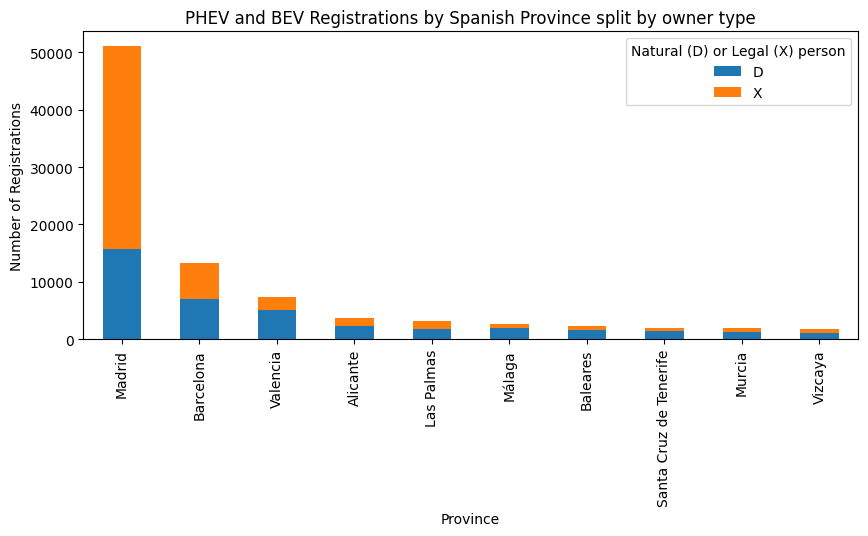

In [17]:
# Group by province and person type, then calculate totals
person_or_company_df = bev_and_phev_df.groupby(['PROV_NAME', 'PERSONA_FISICA_JURIDICA'], observed=True).size().unstack().fillna(0)
person_or_company_df['Total'] = person_or_company_df.sum(axis=1)
person_or_company_df = person_or_company_df.sort_values(by='Total', ascending=False)
person_or_company_df = person_or_company_df.drop(columns=['Total'])

# Draw a bar plot of PHEV and BEV registrations by province in Spain split by owner type
ax = person_or_company_df.head(10).plot(kind='bar', stacked=True, figsize=(10, 4))
plt.xlabel('Province')
plt.ylabel('Number of Registrations')
plt.title('PHEV and BEV Registrations by Spanish Province split by owner type')
ax.legend(title='Natural (D) or Legal (X) person')

plt.show()

As we already thought, the provinces with more proportion of cars registered by companies are Madrid and Barcelona. The focus of my analysis is to check if the spanish consumers are buying electrified vehicles, and to see that, I want to check how many of this company registrations are for renting, which in the end have regular drivers and not short term rents.

To do that I will use the `RENTING` field.

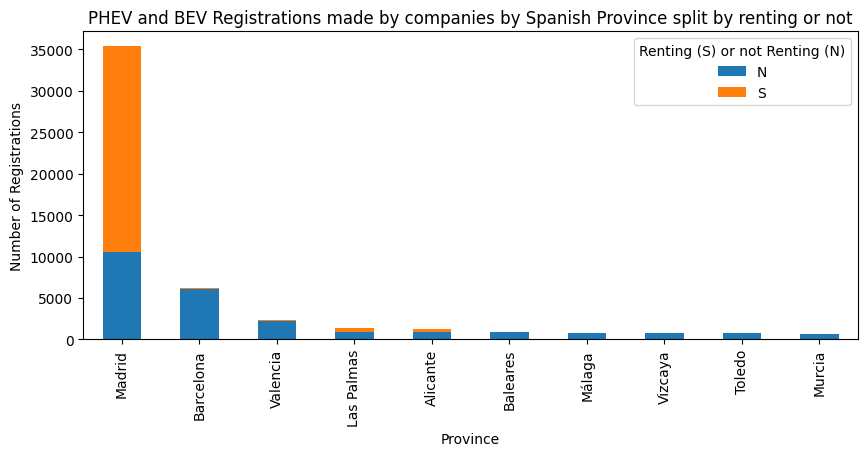

In [18]:
# Filter by only cars registered by companies, group by province and renting or not, then calculate totals
person_or_company_df = bev_and_phev_df[bev_and_phev_df['PERSONA_FISICA_JURIDICA'] == 'X'].groupby(['PROV_NAME', 'RENTING'], observed=True).size().unstack().fillna(0)
person_or_company_df['Total'] = person_or_company_df.sum(axis=1)
person_or_company_df = person_or_company_df.sort_values(by='Total', ascending=False)
person_or_company_df = person_or_company_df.drop(columns=['Total'])

# Draw a bar plot of PHEV and BEV registrations made by companies by province in Spain split by renting or not
ax = person_or_company_df.head(10).plot(kind='bar', stacked=True, figsize=(10, 4))
plt.xlabel('Province')
plt.ylabel('Number of Registrations')
plt.title('PHEV and BEV Registrations made by companies by Spanish Province split by renting or not')
ax.legend(title='Renting (S) or not Renting (N)')

plt.show()

The bar chart we just created is super clear: most of the cars registered by companies in Madrid are destined to a renting costumer.

This information is useful but brings uncertainty to our analysis. With this data, even though we can answer our second question ("Which spanish provinces have the biggest and smallest number of electrified vehicles registrations?"), **we can't really assess the provinces with more consumers driving the electrification of the spanish car park** because the institutions offering renting cars (mostly banks) are probably registered in Madrid but their customers may be in many different regions in Spain.

So, **our second question is answered but is not really useful due to the lack of data for the final users of the registered cars.**

We can though make a last analysis regarding this question which could be how many electric cars per capita are registered by natural persons in the provinces with top 5 number of registrations.

In [19]:
# Filter by only cars registered by natural persons, group by province and only PHEV and BEV registrations, then calculate totals
natural_person_bev_and_phev_df = bev_and_phev_df[bev_and_phev_df['PERSONA_FISICA_JURIDICA'] == 'D'].groupby(['PROV_NAME', 'BEV_OR_PHEV'], observed=True).size().unstack().fillna(0)
natural_person_bev_and_phev_df['Total'] = natural_person_bev_and_phev_df.sum(axis=1)
natural_person_bev_and_phev_df = natural_person_bev_and_phev_df.sort_values(by='Total', ascending=False)
natural_person_bev_and_phev_df = natural_person_bev_and_phev_df.drop(columns=['Total'])

natural_person_bev_and_phev_df.head(5)

BEV_OR_PHEV,BEV,PHEV
PROV_NAME,,
Madrid,8981,6673
Barcelona,4478,2629
Valencia,3046,2080
Alicante,1514,875
Málaga,1264,654


In [20]:
# Populations of the top 5 provinces
madrid_pop = 6871903
barcelona_pop = 5877672
valencia_pop = 2710808
alicante_pop = 1991259
malaga_pop = 1789103

bev_phev_per_capita = {
    'Province' : ['Madrid', 'Barcelona', 'Valencia', 'Alicante', 'Málaga'],
    'Population' : [madrid_pop, barcelona_pop, valencia_pop, alicante_pop, malaga_pop],
    'PHEV' : [
        natural_person_bev_and_phev_df.iloc[0, 0],
        natural_person_bev_and_phev_df.iloc[1, 0],
        natural_person_bev_and_phev_df.iloc[2, 0],
        natural_person_bev_and_phev_df.iloc[3, 0],
        natural_person_bev_and_phev_df.iloc[4, 0]
    ],
    'PHEV_per_capita' : [
        natural_person_bev_and_phev_df.iloc[0, 0] / madrid_pop * 100,
        natural_person_bev_and_phev_df.iloc[1, 0] / barcelona_pop * 100,
        natural_person_bev_and_phev_df.iloc[2, 0] / valencia_pop * 100,
        natural_person_bev_and_phev_df.iloc[3, 0] / alicante_pop * 100,
        natural_person_bev_and_phev_df.iloc[4, 0] / malaga_pop * 100
    ],
    'BEV' : [
        natural_person_bev_and_phev_df.iloc[0, 1],
        natural_person_bev_and_phev_df.iloc[1, 1],
        natural_person_bev_and_phev_df.iloc[2, 1],
        natural_person_bev_and_phev_df.iloc[3, 1],
        natural_person_bev_and_phev_df.iloc[4, 1]
    ],
    'BEV_per_capita' : [
        natural_person_bev_and_phev_df.iloc[0, 1] / madrid_pop * 100,
        natural_person_bev_and_phev_df.iloc[1, 1] / barcelona_pop * 100,
        natural_person_bev_and_phev_df.iloc[2, 1] / valencia_pop * 100,
        natural_person_bev_and_phev_df.iloc[3, 1] / alicante_pop * 100,
        natural_person_bev_and_phev_df.iloc[4, 1] / malaga_pop * 100
    ],
}

bev_phev_per_capita_df = pd.DataFrame(bev_phev_per_capita)
bev_phev_per_capita_df

,Province,Population,PHEV,PHEV_per_capita,BEV,BEV_per_capita
0,Madrid,6871903,8981,0.130692,6673,0.097106
1,Barcelona,5877672,4478,0.076187,2629,0.044729
2,Valencia,2710808,3046,0.112365,2080,0.076730
3,Alicante,1991259,1514,0.076032,875,0.043942
4,Málaga,1789103,1264,0.070650,654,0.036555


We can see that Madrid and Valencia are the leaders in terms of electrified vehicles per capita and Barcelona, Alicante and Malaga have similar numbers. Would be interesting to analize what is driving this behaviour to be able to implement measures to improve the rates in the other cities.

With this, we can go tackle the third question:
**Which spanish provinces are registering more and less polluting vehicles?**

For that, we will use the column `CO2_ITV`. Let's first see how the whole country performs in this regard.

In [21]:
print(f'The average CO2/km emissions of all cars registered in Spain for the last 12 months is {"{:.2f}".format(df["CO2_ITV"].mean())}g CO2/km.')

The average CO2/km emissions of all cars registered in Spain for the last 12 months is 123.09g CO2/km.


These are really bad news for Spain. **The European Commission has [fleet-wide CO2 emission targets](https://climate.ec.europa.eu/eu-action/transport/road-transport-reducing-co2-emissions-vehicles/co2-emission-performance-standards-cars-and-vans_en) for cars of 95 g CO2/km in 2024 and 93,6 g CO2/km for 2025 to 2029.**

**Spain is far avobe this target when we look at car registrations. The government has to really act in an urgent way to change this situation if they want the country to be compliant with EU Comission targets.**

To gain a little bit of context, let's see how the most registered car models average in g CO2/km.

In [22]:
co2_models_df = df.groupby(['MARCA_ITV', 'MODELO_ITV'], observed=True).agg({
    'BASTIDOR_ITV': 'count',
    'CO2_ITV': 'mean'
})
co2_models_df = co2_models_df.sort_values(by='BASTIDOR_ITV', ascending=False)
co2_models_df.head(15)

,,BASTIDOR_ITV,CO2_ITV
MARCA_ITV,MODELO_ITV,,
DACIA,SANDERO,32966,117.207428
SEAT,IBIZA,22610,118.133415
TOYOTA,TOYOTA COROLLA,21878,102.693787
HYUNDAI,TUCSON,21570,131.429321
TOYOTA,TOYOTA C-HR,21259,93.797684
SEAT,ARONA,21201,123.650345
MG,MG ZS,20058,147.115967
KIA,SPORTAGE,18989,134.226074
TOYOTA,TOYOTA YARIS CROSS,18554,106.735313


We see that for the 15 models with more registrations in the last 12 months, only the TOYOTA C-HR has an average g CO2 /km value inside the EU Comission Targets.

Let's now proceed with the analysis per province. To avoid the renting effect seen in the previous question, we will just take into account cars registered by natural persons.

In [23]:
co2_df = df[df['PERSONA_FISICA_JURIDICA'] == 'D'].copy() # Create a new df of registrations only done by natural persons
co2_df = pd.get_dummies(co2_df, columns=['PROPULSION_METHOD']) # Create dummy columns to aggregate the total of cars by propulsion method

# Select only the province code, the VIN number (to later obtain the total cars registered in that province), the CO2 emitions and the propulsion method
co2_df = co2_df[[
    'PROV_NAME',
    'BASTIDOR_ITV',
    'CO2_ITV',
    'PROPULSION_METHOD_BEV',
    'PROPULSION_METHOD_Diesel',
    'PROPULSION_METHOD_HEV',
    'PROPULSION_METHOD_Not specified',
    'PROPULSION_METHOD_Others',
    'PROPULSION_METHOD_PHEV',
    'PROPULSION_METHOD_Pure Gas'
    ]]
# Group by province and sort by average CO2 emissions
co2_df = co2_df.groupby(['PROV_NAME'], observed=True).agg({
    'BASTIDOR_ITV': 'count',
    'CO2_ITV': 'mean',
    'PROPULSION_METHOD_BEV': 'sum',
    'PROPULSION_METHOD_Diesel': 'sum',
    'PROPULSION_METHOD_HEV': 'sum',
    'PROPULSION_METHOD_Not specified': 'sum',
    'PROPULSION_METHOD_Others': 'sum',
    'PROPULSION_METHOD_PHEV': 'sum',
    'PROPULSION_METHOD_Pure Gas': 'sum',
})
co2_df = co2_df.sort_values(by='CO2_ITV', ascending=False)
co2_df.head()

,BASTIDOR_ITV,CO2_ITV,PROPULSION_METHOD_BEV,PROPULSION_METHOD_Diesel,PROPULSION_METHOD_HEV,PROPULSION_METHOD_Not specified,PROPULSION_METHOD_Others,PROPULSION_METHOD_PHEV,PROPULSION_METHOD_Pure Gas
PROV_NAME,,,,,,,,,
Ceuta,860,131.052139,7,45,380,2,12,12,402
Huesca,1984,129.656097,91,164,754,0,81,82,812
Albacete,2632,129.510071,94,192,1077,5,106,73,1085
Teruel,957,128.538040,37,81,404,0,34,30,371
Jaén,3749,127.698189,138,279,1597,22,207,104,1402


Now we have a dataframe to analyze the CO2 emissions of the cars registered in each province.

Let's see what insights can we get from it.

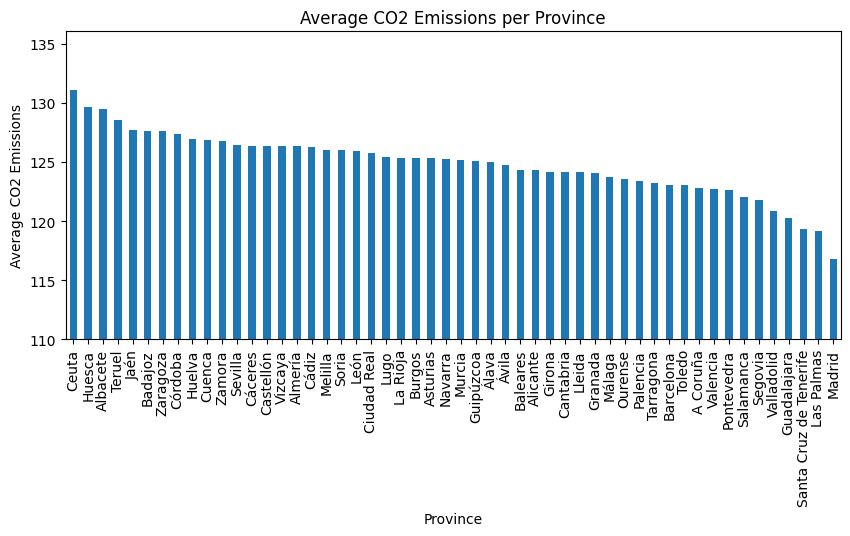

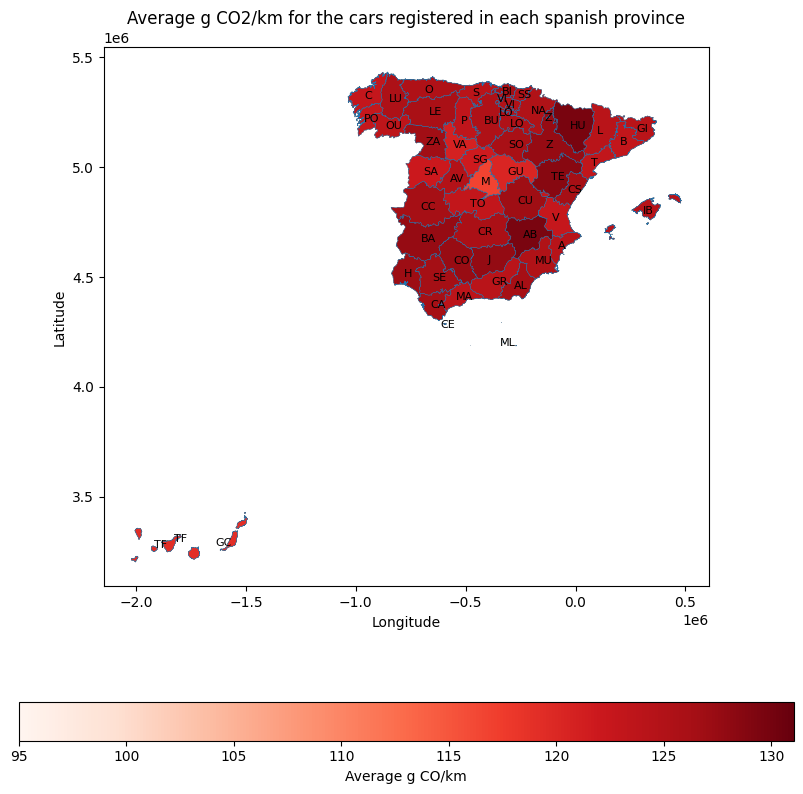

,CODE,NAME
9,A,Alicante
40,AB,Albacete
464,AL,Almería
325,AV,Ávila
14,B,Barcelona
66,BA,Badajoz
29,BI,Vizcaya
285,BU,Burgos
339,C,A Coruña
13,CA,Cádiz


In [24]:
# Create a bar chart with the average CO2 emissions per province
co2_df['CO2_ITV'].plot(kind='bar', figsize=(10, 4))
plt.xlabel('Province')
plt.ylabel('Average CO2 Emissions')
plt.title('Average CO2 Emissions per Province')

# Set the y-axis limit to start at 110
plt.ylim(110, co2_df['CO2_ITV'].max() + 5)

plt.show()

# Import the map of Spain
shapefile_link = 'https://stacks.stanford.edu/object/np165yq7060'
# Downloads the file
response = requests.get(shapefile_link)
# Unzips the file
zip_file = zipfile.ZipFile(io.BytesIO(response.content))
zip_file.extractall('./map')
map = gpd.read_file('./map/ESP_adm2.shp')
map.head()
# Map the province names to the codes in our DF
map['PROV_CODE'] = map['NAME_2'].apply(lambda name: df[df['PROV_NAME'] == name]['COD_PROVINCIA_VEH'].iloc[0] if len(df[df['PROV_NAME'] == name]) > 0 else None)
map['CO2'] = map['NAME_2'].map(co2_df['CO2_ITV']) # Add the CO2 information to the map
map = map.to_crs(epsg=3857)  # Re-project to Web Mercator (EPSG:3857)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
map.plot(ax=ax, color='white', edgecolor='black', linewidth=0.25)
map.boundary.plot(ax=ax, linewidth=0.25)
map.plot(column=map['CO2'], ax=ax, legend=True, cmap=plt.get_cmap('Reds'), vmin = 95,
           legend_kwds={'label': "Average g CO/km",
                        'orientation': "horizontal"})
# Add labels for each province
for x, y, label in zip(map.geometry.centroid.x, map.geometry.centroid.y, map['PROV_CODE']):
    ax.annotate(label, xy=(x, y), xytext=(-3, -3), textcoords="offset points", fontsize=8)

# Customize the plot
ax.set_title('Average g CO2/km for the cars registered in each spanish province')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot & the province codes for reference
plt.show()
code_names


This map should ring some alarms. The provinces that were in the average CO2 emissions targets by the EU Comission (95 g CO2/km) should be in white, but the map is full of red! 😨

Let's now look a bit closer into the provinces with more average CO2/km.

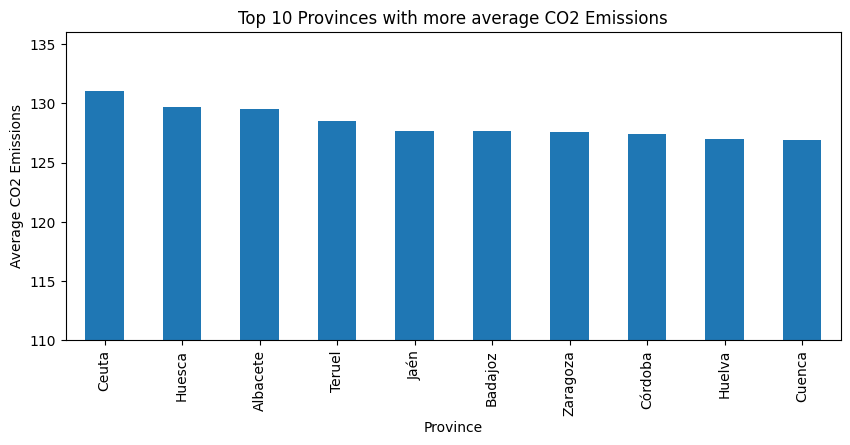

In [25]:
# Create a bar chart with the top 10 provinces with more average CO2/km
co2_df['CO2_ITV'].head(10).plot(kind='bar', figsize=(10, 4))
plt.xlabel('Province')
plt.ylabel('Average CO2 Emissions')
plt.title('Top 10 Provinces with more average CO2 Emissions')

# Set the y-axis limit to start at 110
plt.ylim(110, co2_df['CO2_ITV'].max() + 5)

plt.show()


We see that **Ceuta is the province which registered an average of more CO2 emissions** followed by Huesca and Albacete.

**The top 10 provinces which registered bigger number of high-polluting cars are in southern part of Spain** (besides the 3 forming Aragón), **which is really sad taking in account the amount of sun hours they get every year which should lead to competitive 100% renewable electricity prices.**

**Again, we see a clear open task for both the central and regional administrations to boost electromobility.**


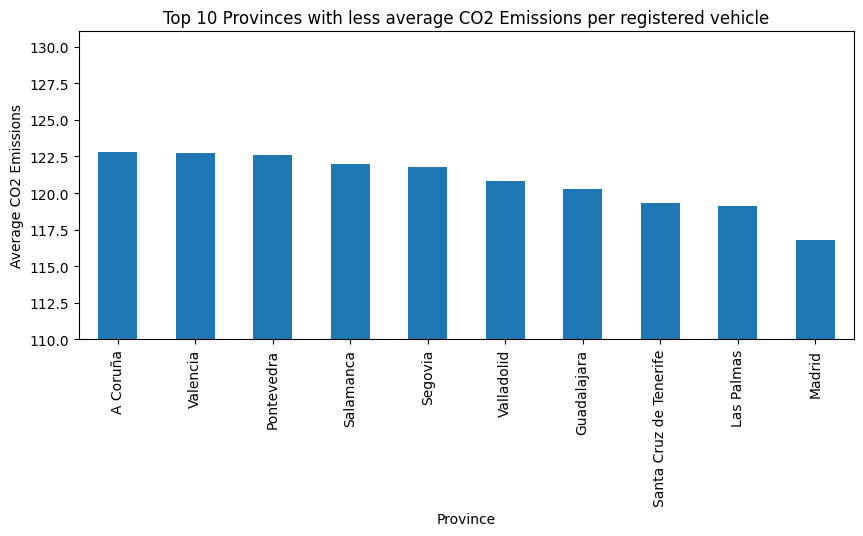

In [26]:
# Create a bar chart with the top 10 provinces with more average CO2/km
co2_df['CO2_ITV'].tail(10).plot(kind='bar', figsize=(10, 4))
plt.xlabel('Province')
plt.ylabel('Average CO2 Emissions')
plt.title('Top 10 Provinces with less average CO2 Emissions per registered vehicle')

# Set the y-axis limit to start at 110
plt.ylim(110, co2_df['CO2_ITV'].max())

plt.show()


We see that Madrid is the city with less CO2 emissions per registered vehicle, but still has a long way to reach the targets of the EU Comission.

With this, our third question gets answered. Let's go for the fourth one: **Which car brands are selling more and less ecological cars in Spain?**

To do that we will build a data frame that has the average g CO2/km of each brand and the number of cars registered for each propulsion type.

In [27]:
# Create a DF with the average g CO2/km of each brand and the number of cars registered for each propulsion type
cars_co2_df = df[df['PERSONA_FISICA_JURIDICA'] == 'D'].copy() # Create a new df of registrations only done by natural persons
cars_co2_df = pd.get_dummies(cars_co2_df, columns=['PROPULSION_METHOD']) # Create dummy columns to aggregate the total of cars by propulsion method

# Select only the province code, the VIN number (to later obtain the total cars registered in that province), the CO2 emitions and the propulsion method
cars_co2_df = cars_co2_df[[
    'MARCA_ITV',
    'BASTIDOR_ITV',
    'CO2_ITV',
    'PROPULSION_METHOD_BEV',
    'PROPULSION_METHOD_Diesel',
    'PROPULSION_METHOD_HEV',
    'PROPULSION_METHOD_Not specified',
    'PROPULSION_METHOD_Others',
    'PROPULSION_METHOD_PHEV',
    'PROPULSION_METHOD_Pure Gas'
    ]]
# Group by province and sort by average CO2 emissions
cars_co2_df = cars_co2_df.groupby(['MARCA_ITV'], observed=True).agg({
    'BASTIDOR_ITV': 'count',
    'CO2_ITV': 'mean',
    'PROPULSION_METHOD_BEV': 'sum',
    'PROPULSION_METHOD_Diesel': 'sum',
    'PROPULSION_METHOD_HEV': 'sum',
    'PROPULSION_METHOD_Not specified': 'sum',
    'PROPULSION_METHOD_Others': 'sum',
    'PROPULSION_METHOD_PHEV': 'sum',
    'PROPULSION_METHOD_Pure Gas': 'sum',
})
cars_co2_df = cars_co2_df.sort_values(by='CO2_ITV', ascending=True)
cars_co2_df

,BASTIDOR_ITV,CO2_ITV,PROPULSION_METHOD_BEV,PROPULSION_METHOD_Diesel,PROPULSION_METHOD_HEV,PROPULSION_METHOD_Not specified,PROPULSION_METHOD_Others,PROPULSION_METHOD_PHEV,PROPULSION_METHOD_Pure Gas
MARCA_ITV,,,,,,,,,
BYD,5459,21.990276,3505,0,0,0,0,1954,0
LYNK&CO,9,24.000000,1,0,0,0,0,8,0
DS,68,80.485291,0,18,0,0,0,37,13
SIN MARCA,319,92.768990,2,105,44,1,0,132,35
LANCIA,10,103.000000,0,0,7,2,0,0,1
...,...,...,...,...,...,...,...,...,...
WESTFALIA-WERKE,1,NaN,0,0,0,1,0,0,0
XPENG,55,NaN,55,0,0,0,0,0,0
YAMAHA,1,NaN,0,0,0,1,0,0,0


We see weird things here. First of all, we see a brand `SIN MARCA`, which means without brand, we'll look into it later. But what a clear error is that the more ecological brand still has some CO2/km figure, when we know for sure there are companies like Tesla or XPENG only selling BEVs in Spain.

In the case of XPENG, we already see in the table that only has sold BEV but its average CO2 emissions is NaN, so probably our original data frame is full of NaNs for BEVS. Let's correct that.

In [28]:
# Put a zero in the g CO2/km emissions of all BEV cars
df['CO2_ITV'] = df.apply(lambda row: 0 if row['PROPULSION_METHOD'] == 'BEV' else row['CO2_ITV'], axis=1)
# See how many NAs are left
df['CO2_ITV'].isna().value_counts()

,count
CO2_ITV,
False,1031426
True,1388


With this amount of NAs we are comfortable to generate the `car_co2_df` again and tackle the `SIN MARCA` problem.

In [29]:
# Create a DF with the average g CO2/km of each brand and the number of cars registered for each propulsion type
cars_co2_df = df[df['PERSONA_FISICA_JURIDICA'] == 'D'].copy() # Create a new df of registrations only done by natural persons
cars_co2_df = pd.get_dummies(cars_co2_df, columns=['PROPULSION_METHOD']) # Create dummy columns to aggregate the total of cars by propulsion method

# Select only the province code, the VIN number (to later obtain the total cars registered in that province), the CO2 emitions and the propulsion method
cars_co2_df = cars_co2_df[[
    'MARCA_ITV',
    'BASTIDOR_ITV',
    'CO2_ITV',
    'PROPULSION_METHOD_BEV',
    'PROPULSION_METHOD_Diesel',
    'PROPULSION_METHOD_HEV',
    'PROPULSION_METHOD_Not specified',
    'PROPULSION_METHOD_Others',
    'PROPULSION_METHOD_PHEV',
    'PROPULSION_METHOD_Pure Gas'
    ]]
# Group by province and sort by average CO2 emissions
cars_co2_df = cars_co2_df.groupby(['MARCA_ITV'], observed=True).agg({
    'BASTIDOR_ITV': 'count',
    'CO2_ITV': 'mean',
    'PROPULSION_METHOD_BEV': 'sum',
    'PROPULSION_METHOD_Diesel': 'sum',
    'PROPULSION_METHOD_HEV': 'sum',
    'PROPULSION_METHOD_Not specified': 'sum',
    'PROPULSION_METHOD_Others': 'sum',
    'PROPULSION_METHOD_PHEV': 'sum',
    'PROPULSION_METHOD_Pure Gas': 'sum',
})
cars_co2_df = cars_co2_df.sort_values(by='CO2_ITV', ascending=True)
pd.set_option('display.max_rows', None)
cars_co2_df

,BASTIDOR_ITV,CO2_ITV,PROPULSION_METHOD_BEV,PROPULSION_METHOD_Diesel,PROPULSION_METHOD_HEV,PROPULSION_METHOD_Not specified,PROPULSION_METHOD_Others,PROPULSION_METHOD_PHEV,PROPULSION_METHOD_Pure Gas
MARCA_ITV,,,,,,,,,
ABARTH,24,0.000000,24,0,0,0,0,0,0
AIWAYS,2,0.000000,2,0,0,0,0,0,0
DONGFENG,17,0.000000,17,0,0,0,0,0,0
LEAPMOTOR,314,0.000000,314,0,0,0,0,0,0
MAXUS,1,0.000000,1,0,0,0,0,0,0
MOKE INTERNATIONAL LTD,5,0.000000,2,0,0,0,3,0,0
VOYAH,1,0.000000,1,0,0,0,0,0,0
ZHIDOU,1,0.000000,1,0,0,0,0,0,0
TESLA,12625,0.000000,12623,0,0,2,0,0,0


We see a lot of confusing information in this DF coming from brands cars that don't have their propulsion method specified and NaN as average CO2. Let's dropt the NaNs in CO2/km to have a cleaner DF to work and get insights from.

In [30]:
# Drop rows who have NaN as CO2/km and don't specify propulsion method
cars_co2_df = cars_co2_df.dropna(subset=['CO2_ITV'])
cars_co2_df

,BASTIDOR_ITV,CO2_ITV,PROPULSION_METHOD_BEV,PROPULSION_METHOD_Diesel,PROPULSION_METHOD_HEV,PROPULSION_METHOD_Not specified,PROPULSION_METHOD_Others,PROPULSION_METHOD_PHEV,PROPULSION_METHOD_Pure Gas
MARCA_ITV,,,,,,,,,
ABARTH,24,0.000000,24,0,0,0,0,0,0
AIWAYS,2,0.000000,2,0,0,0,0,0,0
DONGFENG,17,0.000000,17,0,0,0,0,0,0
LEAPMOTOR,314,0.000000,314,0,0,0,0,0,0
MAXUS,1,0.000000,1,0,0,0,0,0,0
MOKE INTERNATIONAL LTD,5,0.000000,2,0,0,0,3,0,0
VOYAH,1,0.000000,1,0,0,0,0,0,0
ZHIDOU,1,0.000000,1,0,0,0,0,0,0
TESLA,12625,0.000000,12623,0,0,2,0,0,0


That looks much better. Now let's check the cars without brand.

In [31]:
non_branded_cars = df[df['MARCA_ITV'] == 'SIN MARCA'].groupby('MODELO_ITV')
pd.set_option('display.max_rows', 15)
non_branded_cars.head()

,FEC_MATRICULA,COD_CLASE_MAT,MARCA_ITV,MODELO_ITV,COD_PROCEDENCIA_ITV,BASTIDOR_ITV,CILINDRADA_ITV,POTENCIA_ITV,TARA,PESO_MAX,...,AUTONOMIA_VEHICULO_ELECTRICO,DISTANCIA_EJES_12_ITV,VIA_ANTERIOR_ITV,VIA_POSTERIOR_ITV,TIPO_ALIMENTACION_ITV,ECO_INNOVACION_ITV,CODIGO_ECO_ITV,FEC_PROCESO,PROV_NAME,PROPULSION_METHOD
200,2024-04-10,0,SIN MARCA,DS 3 BLUEHDI 130 AUTOM,3.0,VR1UCYHZ2RW024473,1499,11,0,1750,...,NaN,-2,12,21,M,S,E2 29 37,2024-04-10,Madrid,Diesel
415,2024-04-10,0,SIN MARCA,DS 3 BLUEHDI 130 AUTOM,3.0,VR1UCYHZ6RW025996,1499,11,0,1750,...,NaN,-2,12,21,M,S,E2 29 37,2024-04-10,Madrid,Diesel
426,2024-04-10,0,SIN MARCA,DS 3 BLUEHDI 130 AUTOM,3.0,VR1UCYHZXRW024477,1499,11,0,1750,...,NaN,-2,12,21,M,S,E2 29 37,2024-04-10,Madrid,Diesel
451,2024-04-10,0,SIN MARCA,DS 3 BLUEHDI 130 AUTOM,3.0,VR1UCYHZXRW025998,1499,11,0,1750,...,NaN,-2,12,21,M,S,E2 29 37,2024-04-10,Madrid,Diesel
1036,2024-04-10,0,SIN MARCA,DS 3 BLUEHDI 130 AUTOM,3.0,VR1UCYHZ5RW024483,1499,11,0,1750,...,NaN,-2,12,21,M,S,E2 29 37,2024-04-10,Madrid,Diesel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110208,2025-02-26,0,SIN MARCA,DS 7 BLUEHDI 130 PALLA,3.0,VR1JCYHZ7S***********,1499,11,0,2050,...,NaN,-78,101,80,M,S,E2 29 37,2025-02-26,Madrid,Diesel
111907,2025-02-26,0,SIN MARCA,DS 9 ETENSE 250 RIVOLI,3.0,VR1X2DGSRP***********,1598,11,0,2350,...,NaN,79,82,66,M,N,-,2025-02-26,Madrid,PHEV
126008,2025-02-27,0,SIN MARCA,DS 9 E-TENSE 4X4 360 P,3.0,VR1X25GBRM***********,1598,11,0,2420,...,NaN,79,82,66,M,N,-,2025-02-27,Álava,PHEV
132899,2025-02-27,0,SIN MARCA,DS 7 BLUEHDI 130 ÉTOIL,3.0,VR1JCYHZ4S***********,1499,11,0,2050,...,NaN,-78,101,80,M,S,E2 29 37,2025-02-27,Pontevedra,Diesel


Looks like they are mostly DS cars. Let's fix their brand in the original data frame and see if we are ready to regenerate the `cars_co2_df`.

In [32]:
df['MARCA_ITV'] = df.apply(lambda row: 'DS' if row['MARCA_ITV'] == 'SIN MARCA' and isinstance(row['MODELO_ITV'], str) and 'DS' in row['MODELO_ITV'] else row['MARCA_ITV'], axis=1)
non_branded_cars = df[df['MARCA_ITV'] == 'SIN MARCA'].groupby('MODELO_ITV')
non_branded_cars.head()

,FEC_MATRICULA,COD_CLASE_MAT,MARCA_ITV,MODELO_ITV,COD_PROCEDENCIA_ITV,BASTIDOR_ITV,CILINDRADA_ITV,POTENCIA_ITV,TARA,PESO_MAX,...,AUTONOMIA_VEHICULO_ELECTRICO,DISTANCIA_EJES_12_ITV,VIA_ANTERIOR_ITV,VIA_POSTERIOR_ITV,TIPO_ALIMENTACION_ITV,ECO_INNOVACION_ITV,CODIGO_ECO_ITV,FEC_PROCESO,PROV_NAME,PROPULSION_METHOD
136889,2024-04-30,7,SIN MARCA,SIN MODELO,NaN,WG0STZL5680028825,0,0,0,0,...,NaN,0,0,0,NaN,N,NaN,2024-04-30,Palencia,Not specified
46087,2024-06-12,7,SIN MARCA,AK2000B,3.0,WWC2AK5204W000004,0,0,0,0,...,NaN,0,0,0,NaN,N,NaN,2024-06-12,Pontevedra,Not specified
47539,2024-06-13,7,SIN MARCA,GEYSEN & VERPOORT,3.0,YA9S3620C98115206,0,0,0,0,...,NaN,0,0,0,NaN,N,NaN,2024-06-13,A Coruña,Not specified
61851,2024-07-16,3,SIN MARCA,TOYOTA COROLLA,3.0,NMTBD3BE50R031599,1798,12,0,1835,...,0.0,-116,-6,9,M,S,E6 37,2024-07-16,Barcelona,HEV
70006,2025-01-23,0,SIN MARCA,TIVOLI GRAND,1.0,KPT26A1YSS***********,1497,11,0,1880,...,0.0,40,24,24,M,N,NaN,2025-01-23,Vizcaya,Pure Gas
13247,2025-02-05,7,SIN MARCA,TGS,3.0,WMA56EZZ3R***********,12419,46,0,26000,...,NaN,60,0,0,M,N,NaN,2025-02-05,Madrid,Diesel
17330,2025-02-06,7,SIN MARCA,AROCS 1835 AK,3.0,W1T9642011***********,7698,35,0,18000,...,NaN,0,0,0,M,N,NaN,2025-02-06,Sevilla,Diesel
20757,2025-02-07,3,SIN MARCA,COUNTRYMAN C,3.0,WMW11GA050***********,1499,9,0,2095,...,NaN,-124,59,61,M,S,E24 32,2025-02-07,Barcelona,HEV
75910,2025-02-19,7,SIN MARCA,WEHL,3.0,W090192317***********,0,0,0,0,...,NaN,0,0,0,NaN,N,NaN,2025-02-19,Vizcaya,Not specified


We only have 9 cars left as non branded so we are ready to regenerate the `cars_co2_df`.

In [33]:
# Create a DF with the average g CO2/km of each brand and the number of cars registered for each propulsion type
cars_co2_df = df[df['PERSONA_FISICA_JURIDICA'] == 'D'].copy() # Create a new df of registrations only done by natural persons
cars_co2_df = pd.get_dummies(cars_co2_df, columns=['PROPULSION_METHOD']) # Create dummy columns to aggregate the total of cars by propulsion method

# Select only the province code, the VIN number (to later obtain the total cars registered in that province), the CO2 emitions and the propulsion method
cars_co2_df = cars_co2_df[[
    'MARCA_ITV',
    'BASTIDOR_ITV',
    'CO2_ITV',
    'PROPULSION_METHOD_BEV',
    'PROPULSION_METHOD_Diesel',
    'PROPULSION_METHOD_HEV',
    'PROPULSION_METHOD_Not specified',
    'PROPULSION_METHOD_Others',
    'PROPULSION_METHOD_PHEV',
    'PROPULSION_METHOD_Pure Gas'
    ]]
# Group by province and sort by average CO2 emissions
cars_co2_df = cars_co2_df.groupby(['MARCA_ITV'], observed=True).agg({
    'BASTIDOR_ITV': 'count',
    'CO2_ITV': 'mean',
    'PROPULSION_METHOD_BEV': 'sum',
    'PROPULSION_METHOD_Diesel': 'sum',
    'PROPULSION_METHOD_HEV': 'sum',
    'PROPULSION_METHOD_Not specified': 'sum',
    'PROPULSION_METHOD_Others': 'sum',
    'PROPULSION_METHOD_PHEV': 'sum',
    'PROPULSION_METHOD_Pure Gas': 'sum',
})
cars_co2_df = cars_co2_df.sort_values(by='CO2_ITV', ascending=True)
cars_co2_df = cars_co2_df.dropna(subset=['CO2_ITV'])
pd.set_option('display.max_rows', None)
cars_co2_df

,BASTIDOR_ITV,CO2_ITV,PROPULSION_METHOD_BEV,PROPULSION_METHOD_Diesel,PROPULSION_METHOD_HEV,PROPULSION_METHOD_Not specified,PROPULSION_METHOD_Others,PROPULSION_METHOD_PHEV,PROPULSION_METHOD_Pure Gas
MARCA_ITV,,,,,,,,,
ABARTH,24,0.000000,24,0,0,0,0,0,0
AIWAYS,2,0.000000,2,0,0,0,0,0,0
DONGFENG,17,0.000000,17,0,0,0,0,0,0
LEAPMOTOR,314,0.000000,314,0,0,0,0,0,0
MAXUS,1,0.000000,1,0,0,0,0,0,0
MOKE INTERNATIONAL LTD,5,0.000000,2,0,0,0,3,0,0
VOYAH,1,0.000000,1,0,0,0,0,0,0
ZHIDOU,1,0.000000,1,0,0,0,0,0,0
TESLA,12625,0.000000,12623,0,0,2,0,0,0


Looking at the table, we can clearly distinguish the brands which are selling more ecological cars, obviously this brands are only selling BEVs or PHEVs.

Lets see them ordered by volume.

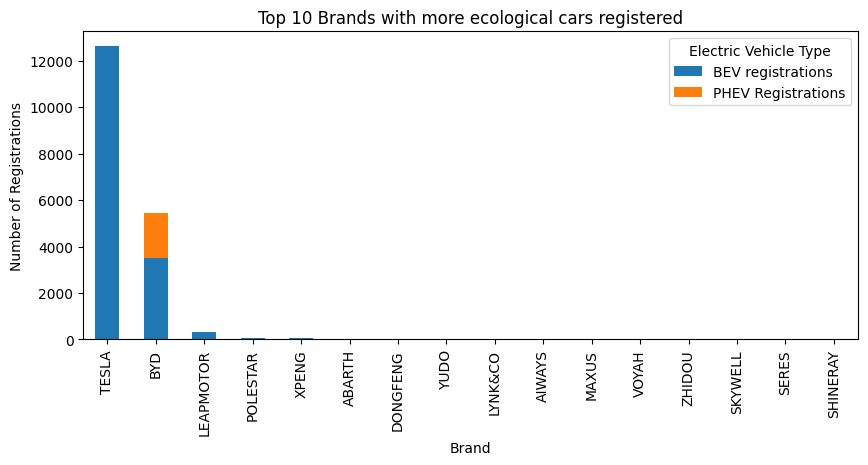

In [34]:
# Draw a bar chart of the volume of cars BEV and PHEV registered by the brands that only sell those types of cars
eco_brands = cars_co2_df[
    (cars_co2_df['PROPULSION_METHOD_Pure Gas'] == 0) &
    (cars_co2_df['PROPULSION_METHOD_Diesel'] == 0) &
    (cars_co2_df['PROPULSION_METHOD_HEV'] == 0) &
    (cars_co2_df['PROPULSION_METHOD_Others'] == 0)
].copy()
eco_brands = eco_brands.sort_values(by='BASTIDOR_ITV', ascending=False)
eco_brands
eco_brands = eco_brands[['PROPULSION_METHOD_BEV', 'PROPULSION_METHOD_PHEV']]
eco_brands.columns = ['BEV registrations', 'PHEV Registrations']
ax = eco_brands.plot(kind='bar', stacked=True, figsize=(10, 4))
plt.xlabel('Brand')
plt.ylabel('Number of Registrations')
plt.title('Top 10 Brands with more ecological cars registered')
ax.legend(title='Electric Vehicle Type')

plt.show()

In this bar plot we clearly see that **TESLA and BYD are leading the sales of ecological cars in Spain**.

When looking at the brands selling less ecological cars, I don't want to focus on the brands with low volume and hypercars like Lamborghini, Buggatti, etc, but to focus on car brands with volume. Because of that, we will trim the data frame to only brands who sell more than 1.000 cars in a year.

In [35]:
big_brands_df = cars_co2_df[cars_co2_df['BASTIDOR_ITV'] > 1000]
big_brands_df = big_brands_df.sort_values(by='CO2_ITV', ascending=False)
big_brands_df

,BASTIDOR_ITV,CO2_ITV,PROPULSION_METHOD_BEV,PROPULSION_METHOD_Diesel,PROPULSION_METHOD_HEV,PROPULSION_METHOD_Not specified,PROPULSION_METHOD_Others,PROPULSION_METHOD_PHEV,PROPULSION_METHOD_Pure Gas
MARCA_ITV,,,,,,,,,
PORSCHE,1071,166.708413,294,0,13,21,0,61,682
OMODA,7338,161.499455,151,0,0,0,0,0,7187
SSANGYONG,1236,161.146677,63,37,0,2,99,0,1035
JAECOO,1548,135.082041,0,0,0,0,0,411,1137
MAZDA,12372,132.428017,2,101,11286,4,0,429,550
NISSAN,14251,131.715901,149,34,10959,7,0,0,3102
AUDI,11276,130.864652,442,3232,2428,70,0,901,4203
VOLKSWAGEN,27880,129.243515,619,3742,2288,100,16,753,20362
SEAT,26971,127.365920,0,731,1801,12,3,184,24240


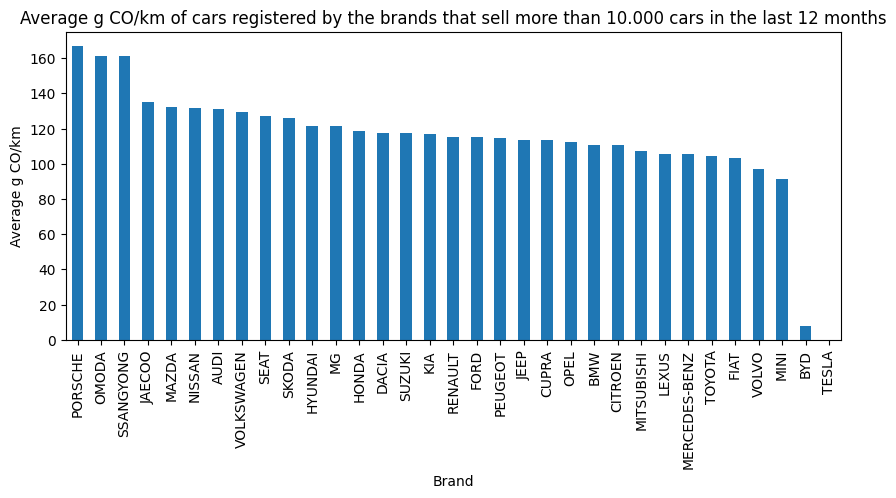

In [36]:
# Draw a bar chart of the average g CO/km of cars registered by the brands that sell more than 1.000 cars in the last 12 months
ax = big_brands_df['CO2_ITV'].plot(kind='bar', stacked=True, figsize=(10, 4))
plt.xlabel('Brand')
plt.ylabel('Average g CO/km')
plt.title(label='Average g CO/km of cars registered by the brands that sell more than 10.000 cars in the last 12 months')

plt.show()

**From all the brands selling more than 1.000 cars in the last 12 months, only TESLA, BYD and MINI are registering an average of g CO2/km below the EU Comission Targets.**

In my opinion, this is not something that the other brands are happy about. Most of them share proudly the vision of a future for the automotive industry with only zero emissions vehicles, have invested lots of money into developing this kind of cars and spend a lot into advertising of their electric models.

**What this analysis shows is that the market in Spain is not choosing the electromobility options that the brands offer, and this is something that the spanish administrations should be really worried about.**

According to the EU Commission, [road transport accounts for about a fifth of EU emissions](https://www.europarl.europa.eu/topics/en/article/20190313STO31218/co2-emissions-from-cars-facts-and-figures-infographics), and Spain at this moment is not contributing to reducing that number.

